In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
from geopy.geocoders import Nominatim

import plotly.express as px
import pandas as pd
import folium

In [2]:
figpath = r"C:\Users\aslou\OneDrive - Københavns Universitet\6. semester\ISDS\isds2023 - Copy\Exam"
datapath = r"C:\Users\aslou\OneDrive - Københavns Universitet\6. semester\ISDS\isds2023 - Copy\Exam"


#File to be used 
filename = 'TaylorSwift_redigeret.xlsx'

# Combine the path and filename to create the complete file path
full_filepath = f"{datapath}/{filename}"

# Europe map 1

In [3]:
# Define the cities in two groups
treat_cities = {
    "Stockholm": "Sweden",
    "Paris": "France",
    "Amsterdam": "Netherlands",
    "Lisbon": "Portugal",
    "Warsaw": "Poland",
    "Milan": "Italy",
    "Zurich": "Switzerland",
    "Munich": "Germany",
    "Madrid": "Spain",
    "Lyon": "France",
    "Gelsenkirchen": "Germany",
    "Hamburg": "Germany",
    "Vienna": "Austria",

}

control_cities = {
    "Copenhagen": "Denmark",
    "Berlin": "Germany",
    "Brussels": "Belgium",
    "Barcelona": "Spain",
    "Krakow": "Poland",
    "Rome": "Italy",
    "Oslo": "Norway",
    "Prague": "Czech Republic",
    "Athens": "Greece",
    "Bologna": "Italy",
    "Herning": "Denmark",
    "Århus": "Denmark",
    "Firenze": "Italy",
}


symbols = {
    "Stockholm": "o",
    "Paris": "^",
    "Amsterdam": "s",
    "Lisbon": "D",
    "Warsaw": "1",
    "Milan": "h",
    "Zurich": "v",
    "Munich": "X",
    "Madrid": "P",
    "Lyon": "x",
    "Gelsenkirchen": "*",
    "Hamburg": "d",
    "Vienna": "+",
    "Copenhagen": "o",
    "Berlin": "^",
    "Brussels": "s",
    "Barcelona": "D",
    "Krakow": "1",
    "Rome": "h",
    "Oslo": "v",
    "Prague": "X",
    "Athens": "P",
    "Bologna": "x",
    "Herning": "*",
    "Århus": "d",
    "Firenze": "+"    
}

# Combine both groups for easier iteration
all_cities = {**treat_cities, **control_cities}

# Get city coordinates
geolocator = Nominatim(user_agent="city_locator")

city_coordinates_EN = {}

for city, country in all_cities.items():
    location = geolocator.geocode(f"{city}, {country}")
    if location:
        city_coordinates_EN[city] = (location.latitude, location.longitude)



c:\Users\aslou\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


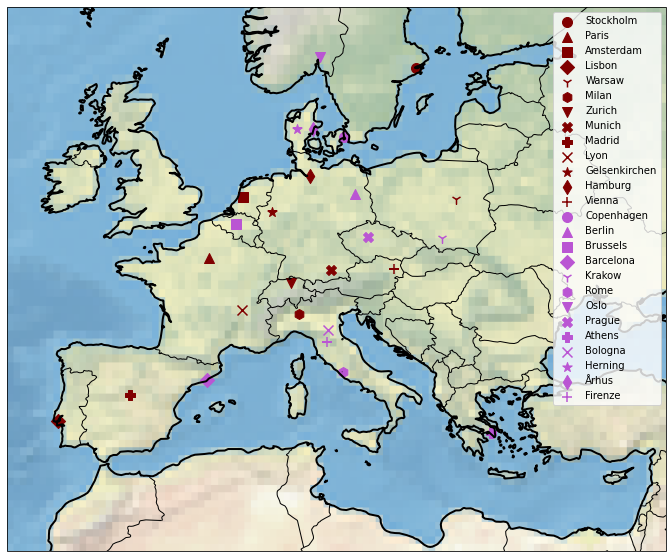

In [4]:
# Create the Cartopy map
proj = ccrs.Miller()
ax = plt.axes(projection=proj)
ax.set_extent([-13, 37, 30, 60])
ax.stock_img()
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)

# Plot cities on the map
for city, (lat, lon) in city_coordinates_EN.items():
    if city in treat_cities:
        color = 'maroon'
    elif city in control_cities:
        color = 'mediumorchid'
    symbol = symbols.get(city, "D")
    ax.scatter(lon, lat, color=color, marker=symbol, s=100, label=city, transform=ccrs.PlateCarree())

# Customize the plot
plt.gcf().set_size_inches(20, 10)
plt.legend()

#Save the plot
full_figpath1 = f"{figpath}/Europe_with_cities.png"
plt.savefig(full_figpath1, dpi=300, bbox_inches="tight", pad_inches=0.1, transparent=False)


## Europe map 2 

In [5]:
#Read in the excel file
data = pd.read_excel(full_filepath, sheet_name='Panel ', header=1)
#Drop the empty columns 
data = data.dropna(axis='columns', how='all')
data.columns = data.columns.str.strip()

# Get a list of unique cities from the 'Cities' column
cities_list = data['Cities'].unique()

# Get city coordinates
geolocator = Nominatim(user_agent="city_locator")

city_coordinates_DK = {}

for city in cities_list:
    location = geolocator.geocode(f"{city}")
    if location:
        city_coordinates_DK[city] = (location.latitude, location.longitude)


In [6]:
# Group by city and calculate the relative index, treated weekend relativt til weekenden før 
data['index'] = (data['Avg_airbnb_price'] / data['Avg_airbnb_price'].shift(1)) * 100

#Keep if concert is 1
mapdata = data[data['Concert'] == 1]

# Keep specific columns
columns_to_keep = ['Cities', 'Avg_airbnb_price', 'Treat', 'index']
mapdata = mapdata[columns_to_keep]


# Create empty columns for latitude and longitude
mapdata['latitude'] = 0.0
mapdata['longitude'] = 0.0


# Populate latitude and longitude columns
for city, (lat, lon) in city_coordinates_DK.items():
    mapdata.loc[mapdata['Cities'] == city, 'latitude'] = lat
    mapdata.loc[mapdata['Cities'] == city, 'longitude'] = lon

#Add reference city to the DF 
reference = {'Cities': 'Reference', 'index': 100, 'latitude':58.181548, 'longitude': -8.497556}

# Append the new row to the DataFrame
mapdata = mapdata.append(reference, ignore_index=True)



In [8]:
# Create a map centered at a specific location
m = folium.Map(location=[mapdata['latitude'].mean(), mapdata['longitude'].mean()], zoom_start=5)

# Add markers for each city
for index, row in mapdata.iterrows():
    treat_color = 'maroon' if row['Treat'] == 1 else ('mediumorchid' if row['Treat'] == 0 else 'black')
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['index'] / 10,  # Adjust the size of the circle
        color=treat_color,
        fill=True,
        fill_color=treat_color,
        fill_opacity=0.6,
        popup=row['Cities'] + ": " + str(row['index'])
    ).add_to(m)


full_figpath2 = f"{figpath}/bubble_map.html"

# Save the map as an HTML file
m.save(full_figpath2)


# Event study 


In [9]:
#Read in the excel file 
data = pd.read_excel(full_filepath, sheet_name='Panel ', header=1)
#Drop the empty columns 
data = data.dropna(axis='columns', how='all')
data.columns = data.columns.str.strip()


In [10]:
#Treatment time colums are the last 14 columns in the data set
treatment_columns = data.columns[-14:]

#Make dictionary with treatment columns as keys and time as values
time = list(range(-3, 4))
etime_list = time + time
etime_dict = dict(zip(treatment_columns  ,etime_list))

#loop over the dict and create etime column
for key, value in etime_dict.items(): 
    data.loc[data[f'{key}'] == 1, 'etime'] = value


In [11]:
#calculate average of Avg_airbnb_price by indicator column and Treatments column 
grouped = data.groupby(['etime','Treat'])['Avg_airbnb_price'].mean()

#make a dataframe from the sorted data
df = pd.DataFrame(grouped).reset_index()

#split into two dataframes by Treat column
df1 = df[df['Treat'] == 0]
df2 = df[df['Treat'] == 1]


#combine the two by etime column
Averages = pd.merge(df1,df2, on = 'etime')

#rename Avg_airbnb_price column
Averages = Averages.rename(columns = {'Avg_airbnb_price_x':'Avg_airbnb_price_0', 'Avg_airbnb_price_y':'Avg_airbnb_price_1'} )

#drop Treat columns 
Averages = Averages.drop(columns = ['Treat_x','Treat_y'])

In [12]:

#Scale Averages prices 
reference_row_index = 2  # Replace with the index of the row you want to use as a reference

# List of columns you want to scale
columns_to_scale = ['Avg_airbnb_price_0', 'Avg_airbnb_price_1']

# Get the values of the reference row for the selected columns
reference_values = Averages.loc[reference_row_index, columns_to_scale]

# Divide all values in the selected columns by the corresponding reference values
Averages[columns_to_scale] = Averages[columns_to_scale].div(reference_values)*100
Averages.set_index('etime', inplace=True)


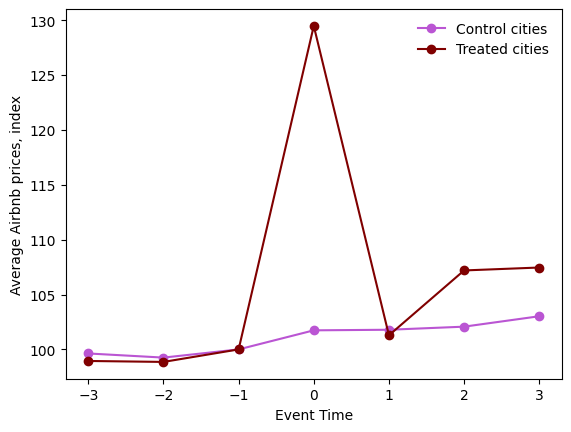

In [13]:
#Plot the data
plt.style.use('default')

Averages.plot(marker = 'o',  color=['mediumorchid', 'maroon'], xlabel = 'Event Time', ylabel = 'Average Airbnb prices, index')

# Remove grid lines and set background to white
plt.grid(axis='both', color='white')

#remove the grid lines
plt.grid(False)

#rename the legends 
plt.legend(['Control cities', 'Treated cities'], frameon=False, loc='upper right')

#make the graph prettier 
plt.rc('font', size=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.grid(axis='y', alpha=0.75) 

#save the graph

full_figpath3 = f"{figpath}/Event_study.png"
plt.savefig(full_figpath3, dpi=300, bbox_inches='tight')